# Visualisation initiales des donn&eacute;es

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import HTML

## Les donn&eacute;es

In [2]:
data = nc.Dataset('Donnees/Donnees_PIE_Meteo.nc')

Pour se faire une idée du contenu du fichier .netcdf :

In [3]:
for var in data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 GP_GDS0_PVL(initial_time0_hours, g0_lat_1, g0_lon_2)
    forecast_time_units: hours
    forecast_time: 0
    level: 2000
    parameter_number: 6
    parameter_table_version: 1
    gds_grid_type: 0
    level_indicator: 117
    _FillValue: 1e+20
    units: m^2/s^2
    long_name: Geopotential
    center: French Weather Service - Toulouse
unlimited dimensions: 
current shape = (31, 361, 720)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 POT_GDS0_PVL(initial_time0_hours, g0_lat_1, g0_lon_2)
    forecast_time_units: hours
    forecast_time: 0
    level: 2000
    parameter_number: 13
    parameter_table_version: 1
    gds_grid_type: 0
    level_indicator: 117
    _FillValue: 1e+20
    units: K
    long_name: Potential temperature
    center: French Weather Service - Toulouse
unlimited dimensions: 
current shape = (31, 361, 720)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 initial_time0_hours(initial_time0_hours)
    units: hours s

In [4]:
print(data['initial_time0'][30,:])

[b'0' b'1' b'/' b'3' b'1' b'/' b'2' b'0' b'1' b'6' b' ' b'(' b'0' b'0'
 b':' b'0' b'0' b')']


### Les dimensions

<ul>
    <li> Temps : 31 échantillons </li>
    <li> Latitude : 361 échantillons </li>
    <li> Longitude : 720 échantillons </li>
</ul>

### Les variables d'int&eacute;r&ecirc;t

<ul>
    <li> 'GP_GDS0_PV' : Le géopotentiel (potentiel gravitationnel au niveau de la tropopause)</li>
    <li> 'POT_GDS0_PV' : La température potentielle (température que le fluide aurait à la pression $P_0=1000hPa$ - moyennant un transport adiabatique)</li>
</ul>

**Ces données sont donc de taille [31,361,720]**

In [5]:
g0 = 9.80665 # standard gravity at sea level m.s^-2

## Visualisation

### A un instant t fixé

In [28]:
def plot_field(field, title, fontsize, cmap):
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    img = ax.imshow(field, cmap=cmap)
    fig.colorbar(img)
    ax.set_yticks([0,90, 180, 270, 360]) 
    ax.set_yticklabels([r'$\pi/2$',r'$\pi/4$', r'$0$', r'$-\pi/4$', r'$-\pi/2$']) 
    ax.set_xticks([0,90, 180, 270, 360, 450, 540, 630, 719]) 
    ax.set_xticklabels([r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$', r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$', r'$2\pi$']) 
    ax.tick_params(labelsize=15, direction='in', length=10, width=1, pad=10, color='white')
    ax.set_title(title, fontsize=fontsize+5, pad=15)
    ax.set_ylabel(r'Latitude $(rad)$', fontsize=fontsize)
    ax.set_xlabel(r'Longitude $(rad)$', fontsize=fontsize)
    plt.show()
    plt.close()
    return

In [7]:
## t entier entre 0 et 30 inclus
t = 28
fontsize = 20
cmap = 'magma'

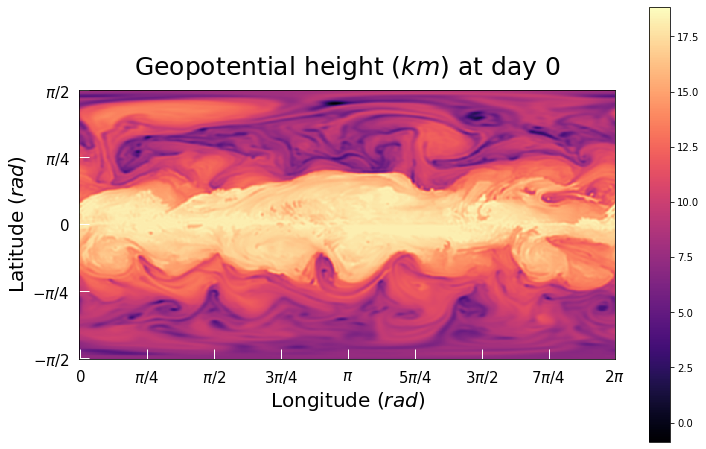

In [27]:
plot_field(field=1e-3*np.array(data['GP_GDS0_PVL'])[t,:,:]/g0, 
           title=r'Geopotential height $(km)$',
           fontsize=fontsize,
           cmap=cmap)

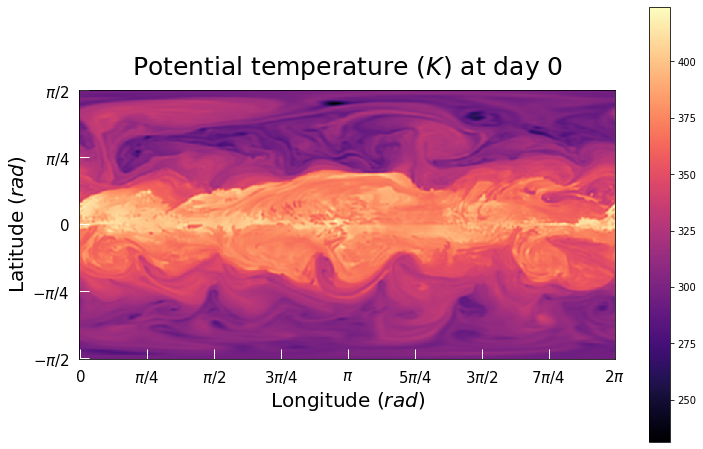

In [29]:
plot_field(field=data['POT_GDS0_PVL'][t,:,:], 
           title=r'Potential temperature $(K)$',
           fontsize=fontsize,
           cmap=cmap)

### Vid&eacute;o 

In [15]:
def video(nb):
    if (nb==0) :
        donnee = 1e-3*np.array(data['GP_GDS0_PVL'])/g0
        title = r'Geopotential height $(km)$'
    else :
        donnee = np.array(data['POT_GDS0_PVL'])
        title = r'Potential temperature $(K)$'
        
    vmin = np.min(donnee)
    vmax = np.max(donnee)
        
    frames = []
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    fig.colorbar(ScalarMappable(cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax)), ax=ax)
    ax.set_yticks([0,90, 180, 270, 360]) 
    ax.set_yticklabels([r'$\pi/2$',r'$\pi/4$', r'$0$', r'$-\pi/4$', r'$-\pi/2$']) 
    ax.set_xticks([0,90, 180, 270, 360, 450, 540, 630, 719]) 
    ax.set_xticklabels([r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$', r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$', r'$2\pi$']) 
    ax.tick_params(labelsize=15, direction='in', length=10, width=1, pad=10, color='white')
    ax.set_title(title, fontsize=fontsize+5, pad=15)
    ax.set_ylabel(r'Latitude $(rad)$', fontsize=fontsize)
    ax.set_xlabel(r'Longitude $(rad)$', fontsize=fontsize)

        
    for i in range(31):
        im = plt.imshow(donnee[i,:,:], cmap=cmap, vmin=vmin, vmax=vmax)
        frames.append([im])

    anim = animation.ArtistAnimation(fig, frames, 
                                     interval=150, ## Video plus ou moins rapide/fluide 
                                     blit=True,
                                     repeat=False) ## Reprendre au début à la fin

    return anim

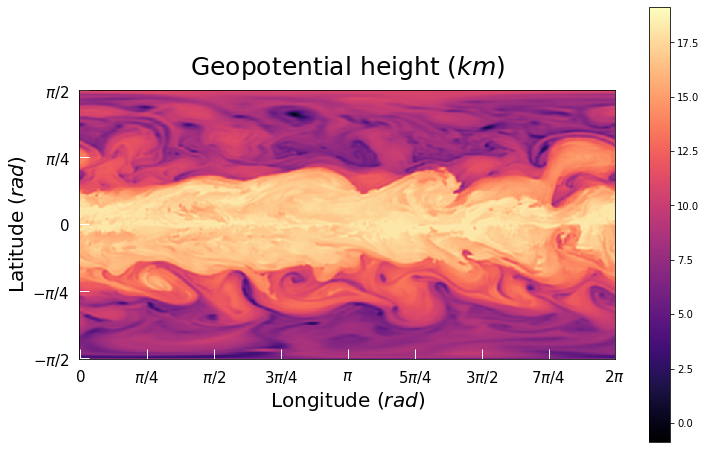

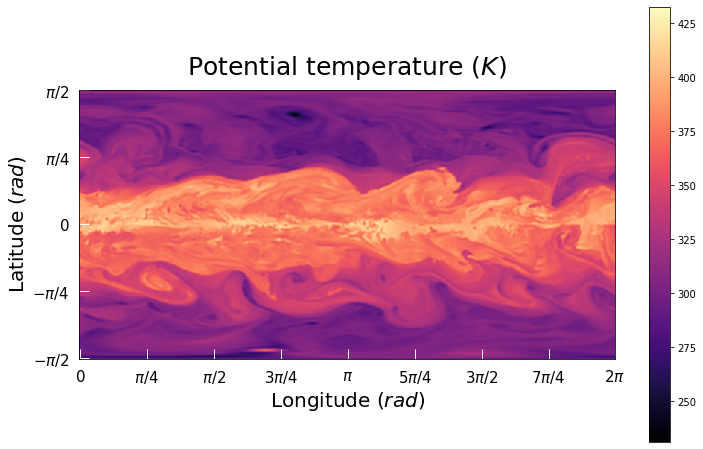

In [24]:
hgt_anim = video(0)
hgt_anim.save(filename='Geop_hgt_anim.mp4')

temp_anim = video(1)
temp_anim.save(filename='Temp_pot_anim.mp4')

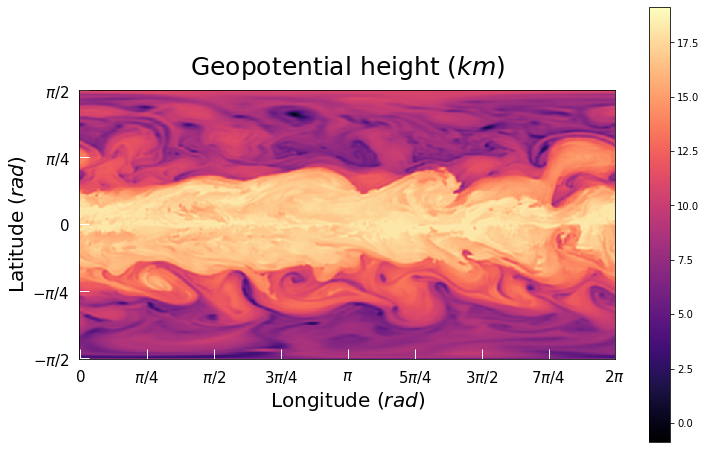

In [11]:
## Variable d'intérêt à afficher
## Géopotentiel : 0  
## Température potentielle : 1
var = 0

HTML(video(var).to_html5_video())